# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

### Notebook Presentation

In [3]:
pd.options.display.float_format = "{:,.2f}".format

### Read the Data

In [4]:
df_data = pd.read_csv("nobel_prize_data.csv")

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [8]:
df_data.describe()

year
count   962.00
mean  1,971.82
std      33.81
min   1,901.00
25%   1,948.00
50%   1,977.00
75%   2,001.00
max   2,020.00

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
print(
    f"Are there any duplicate values in the dataset: {df_data.duplicated().values.any()}"
)

Are there any duplicate values in the dataset: False


### Check for NaN Values

In [10]:
print(f"Are there any duplicate values in the dataset: {df_data.isna().values.any()}")

Are there any duplicate values in the dataset: True


In [11]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [12]:
col_subset = [
    "year",
    "category",
    "laureate_type",
    "birth_date",
    "full_name",
    "organization_name",
]
df_data.loc[df_data.birth_date.isna()][col_subset]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [14]:
separated_values = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data["share_pct"] = numerator / denomenator
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [16]:
df_sex = df_data.sex.value_counts()

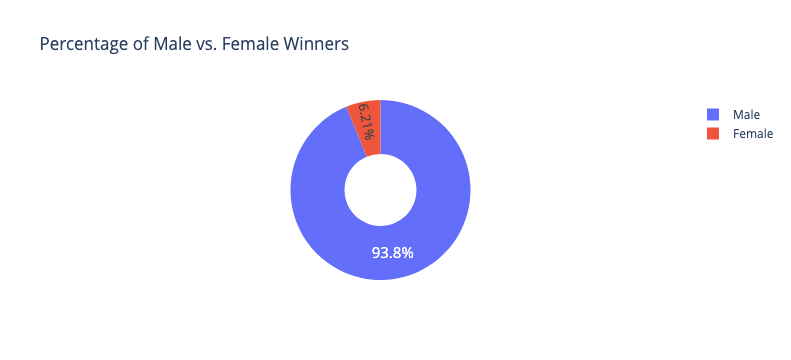

In [17]:
fig = px.pie(
    names=df_sex.index,
    values=df_sex.values,
    hole=0.4,
    title="Percentage of Male vs. Female Winners",
    # labels=df_sex.index
)
fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [18]:
df_data[df_data.sex == "Female"].sort_values("year")[:3]

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [19]:
more_df = df_data.full_name.value_counts()
more_df[more_df.values > 1]

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

In [20]:
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
multiple_winners = df_data[is_winner]
print(
    f"There are {multiple_winners.full_name.nunique()} winners who were awarded the prize more than once."
)

There are 6 winners who were awarded the prize more than once.


In [21]:
col_subset = ["year", "category", "laureate_type", "full_name"]
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
df_categories = df_data.category.value_counts()
df_categories

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

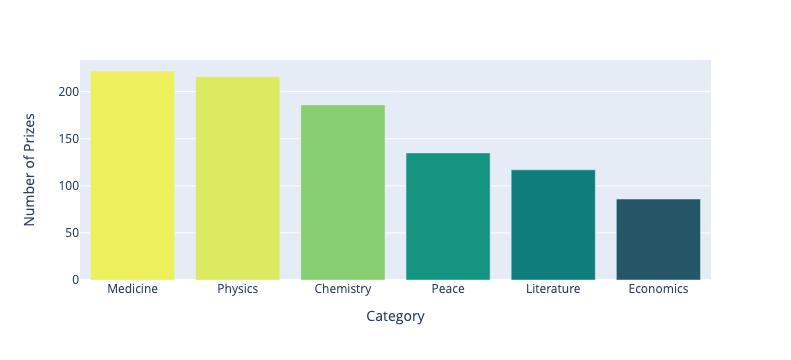

In [23]:
bar = px.bar(
    x=df_categories.index,
    y=df_categories.values,
    color=df_categories.values,
    color_continuous_scale="aggrnyl",
)
bar.update_layout(
    xaxis_title="Category", yaxis_title="Number of Prizes", coloraxis_showscale=False
)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [24]:
df_data[df_data.category == "Economics"].sort_values("year").head()

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
411  1971  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
419  1972  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   
411  "for his empirically founded interpretation of...         1/1   
419  "for their pioneering contributions to general...         1/2   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   
411    Individual      Simon Kuznets 1901-04-30      Pinsk   
419    Individual      John R. Hicks 1904-04-08    Warwick   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   
411  Russian Empire (Belarus)                   Belarus  Male   
419            United Kingdom            United Kingdom  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   
411                           Harvard University     Cambridge, MA   
419                         University of Oxford            Oxford   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00  
411  United States of America  BLR       1.00  
419            United Kingdom  GBR       0.50

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [25]:
df_sex_by_category = df_data.groupby(["category", "sex"], as_index=False).agg(
    {"prize": pd.Series.count}
)
df_sex_by_category.sort_values("prize", ascending=False, inplace=True)
df_sex_by_category

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

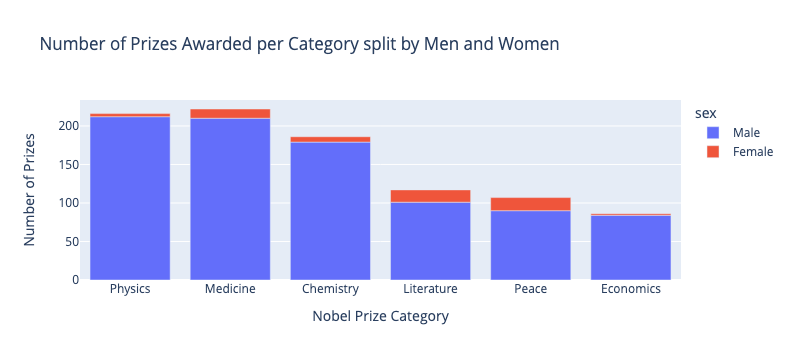

In [26]:
fig = px.bar(
    df_sex_by_category,
    x="category",
    y="prize",
    color="sex",
    title="Number of Prizes Awarded per Category split by Men and Women",
)
fig.update_layout(
    xaxis_title="Nobel Prize Category",
    yaxis_title="Number of Prizes",
)
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [27]:
prize_per_year = df_data.groupby("year").count().prize
# prize_per_year = df_data.year.value_counts().sort_index()
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [28]:
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

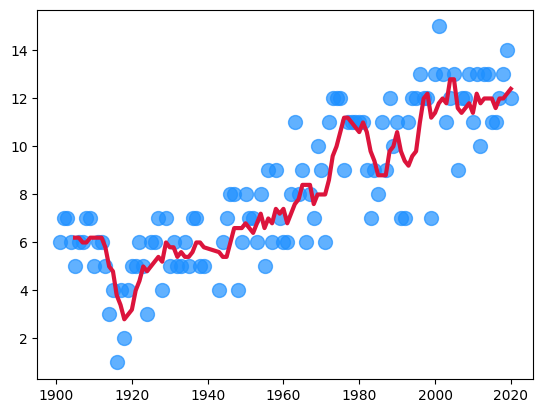

In [29]:
plt.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=0.7,
    s=100,
)
plt.plot(
    prize_per_year.index,
    moving_average.values,
    c="crimson",
    linewidth=3,
)
plt.show()

In [30]:
np.arange(1900, 2021, step=5)

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

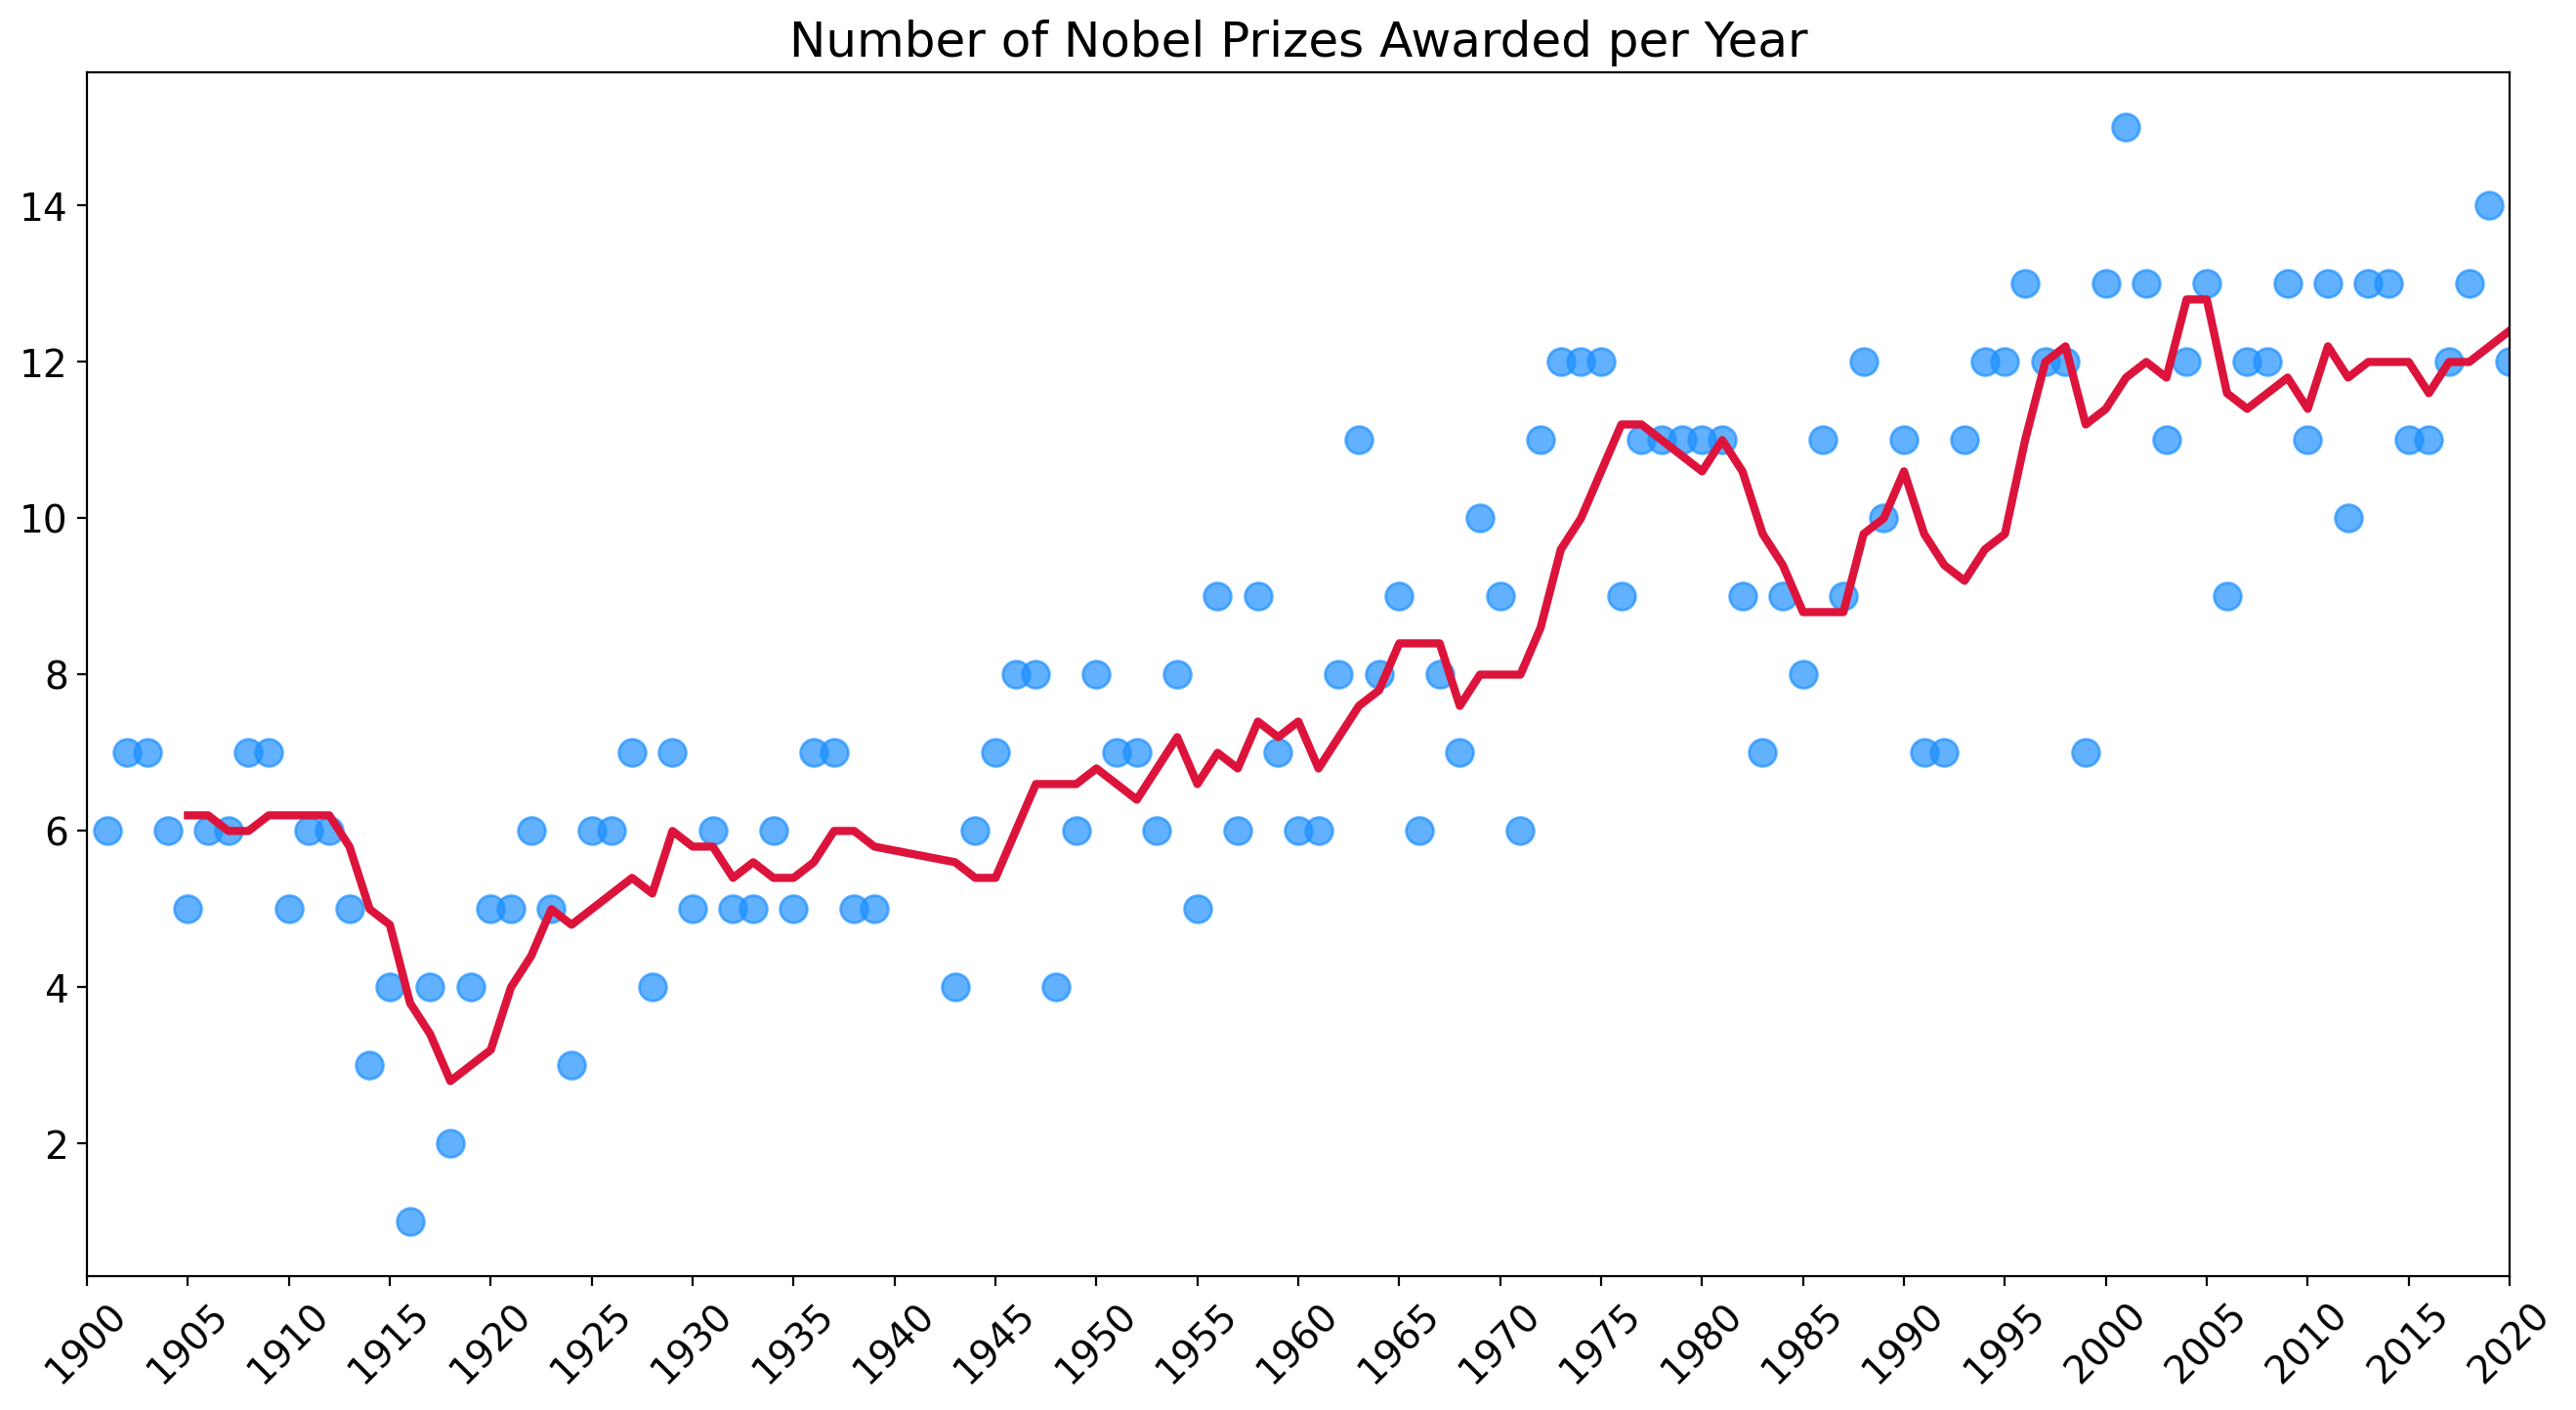

In [31]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)
ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=0.7,
    s=100,
)
ax.plot(
    prize_per_year.index,
    moving_average.values,
    c="crimson",
    linewidth=3,
)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [32]:
yearly_avg_share = df_data.groupby("year").agg({"share_pct": pd.Series.mean})
yearly_avg_share

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

In [33]:
share_moving_average = yearly_avg_share.rolling(window=5).mean()
share_moving_average

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

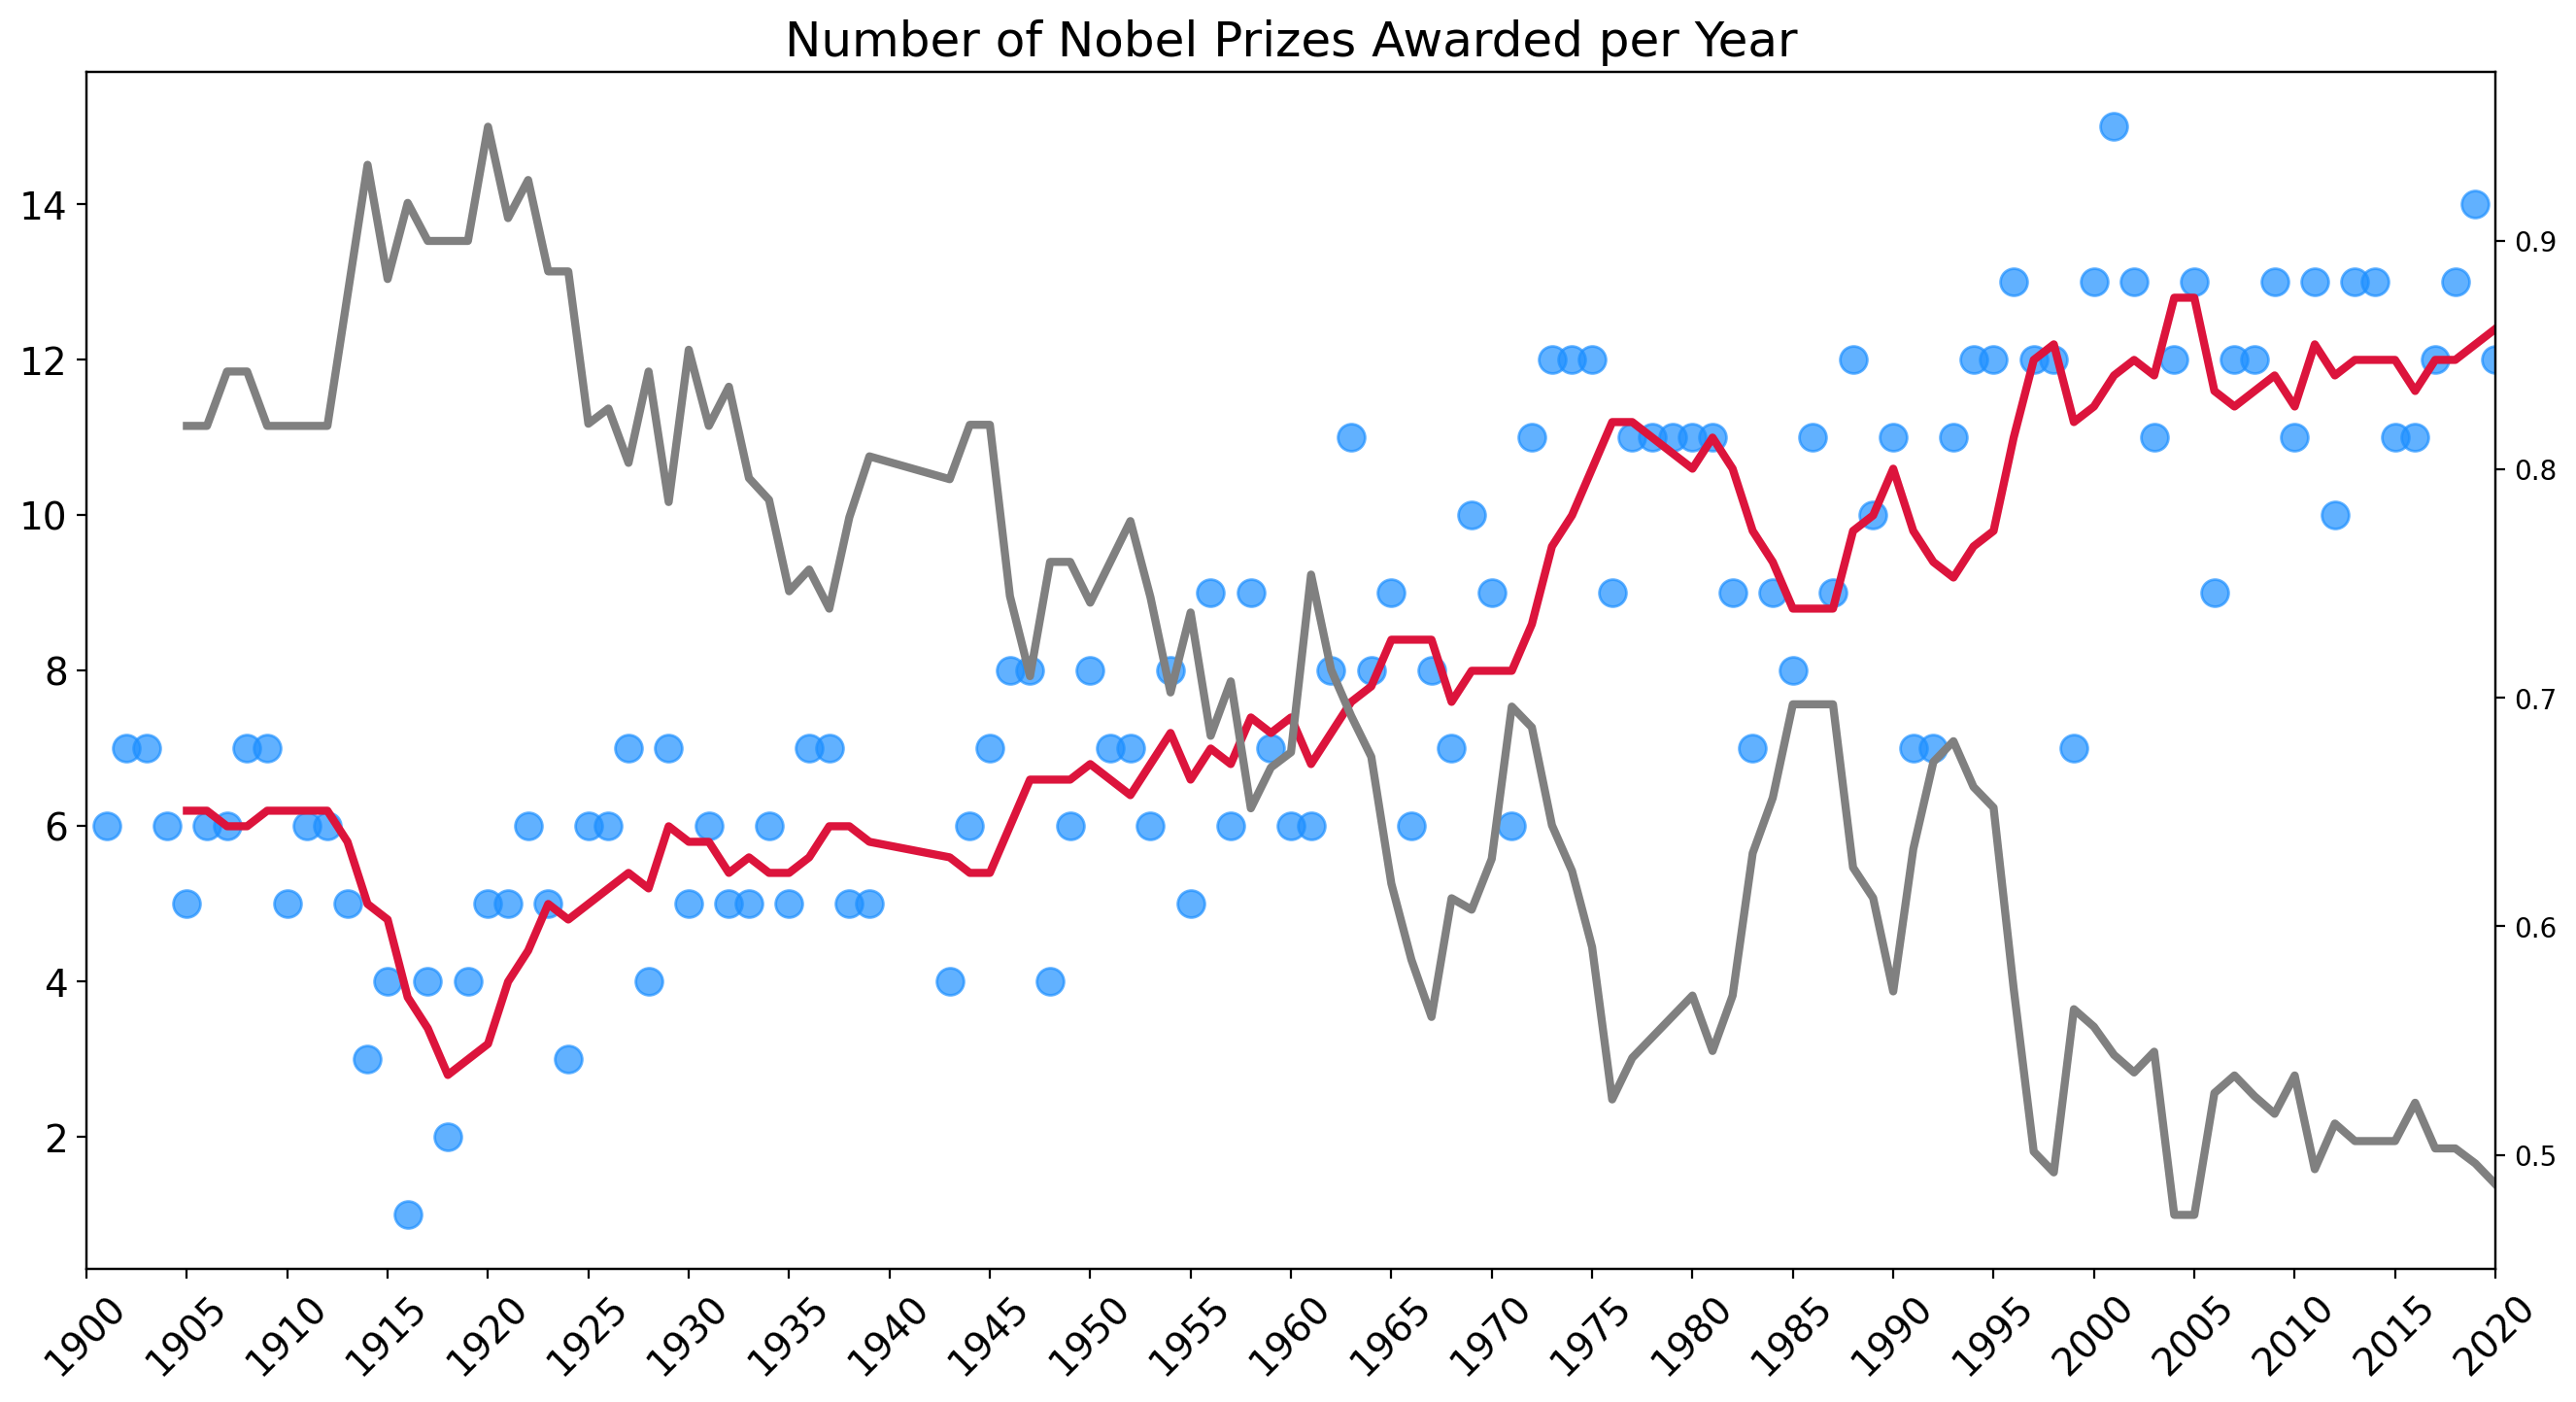

In [34]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=0.7,
    s=100,
)
ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c="crimson",
    linewidth=3,
)
ax2.plot(prize_per_year.index, share_moving_average.values, c="grey", linewidth=3)
plt.show()

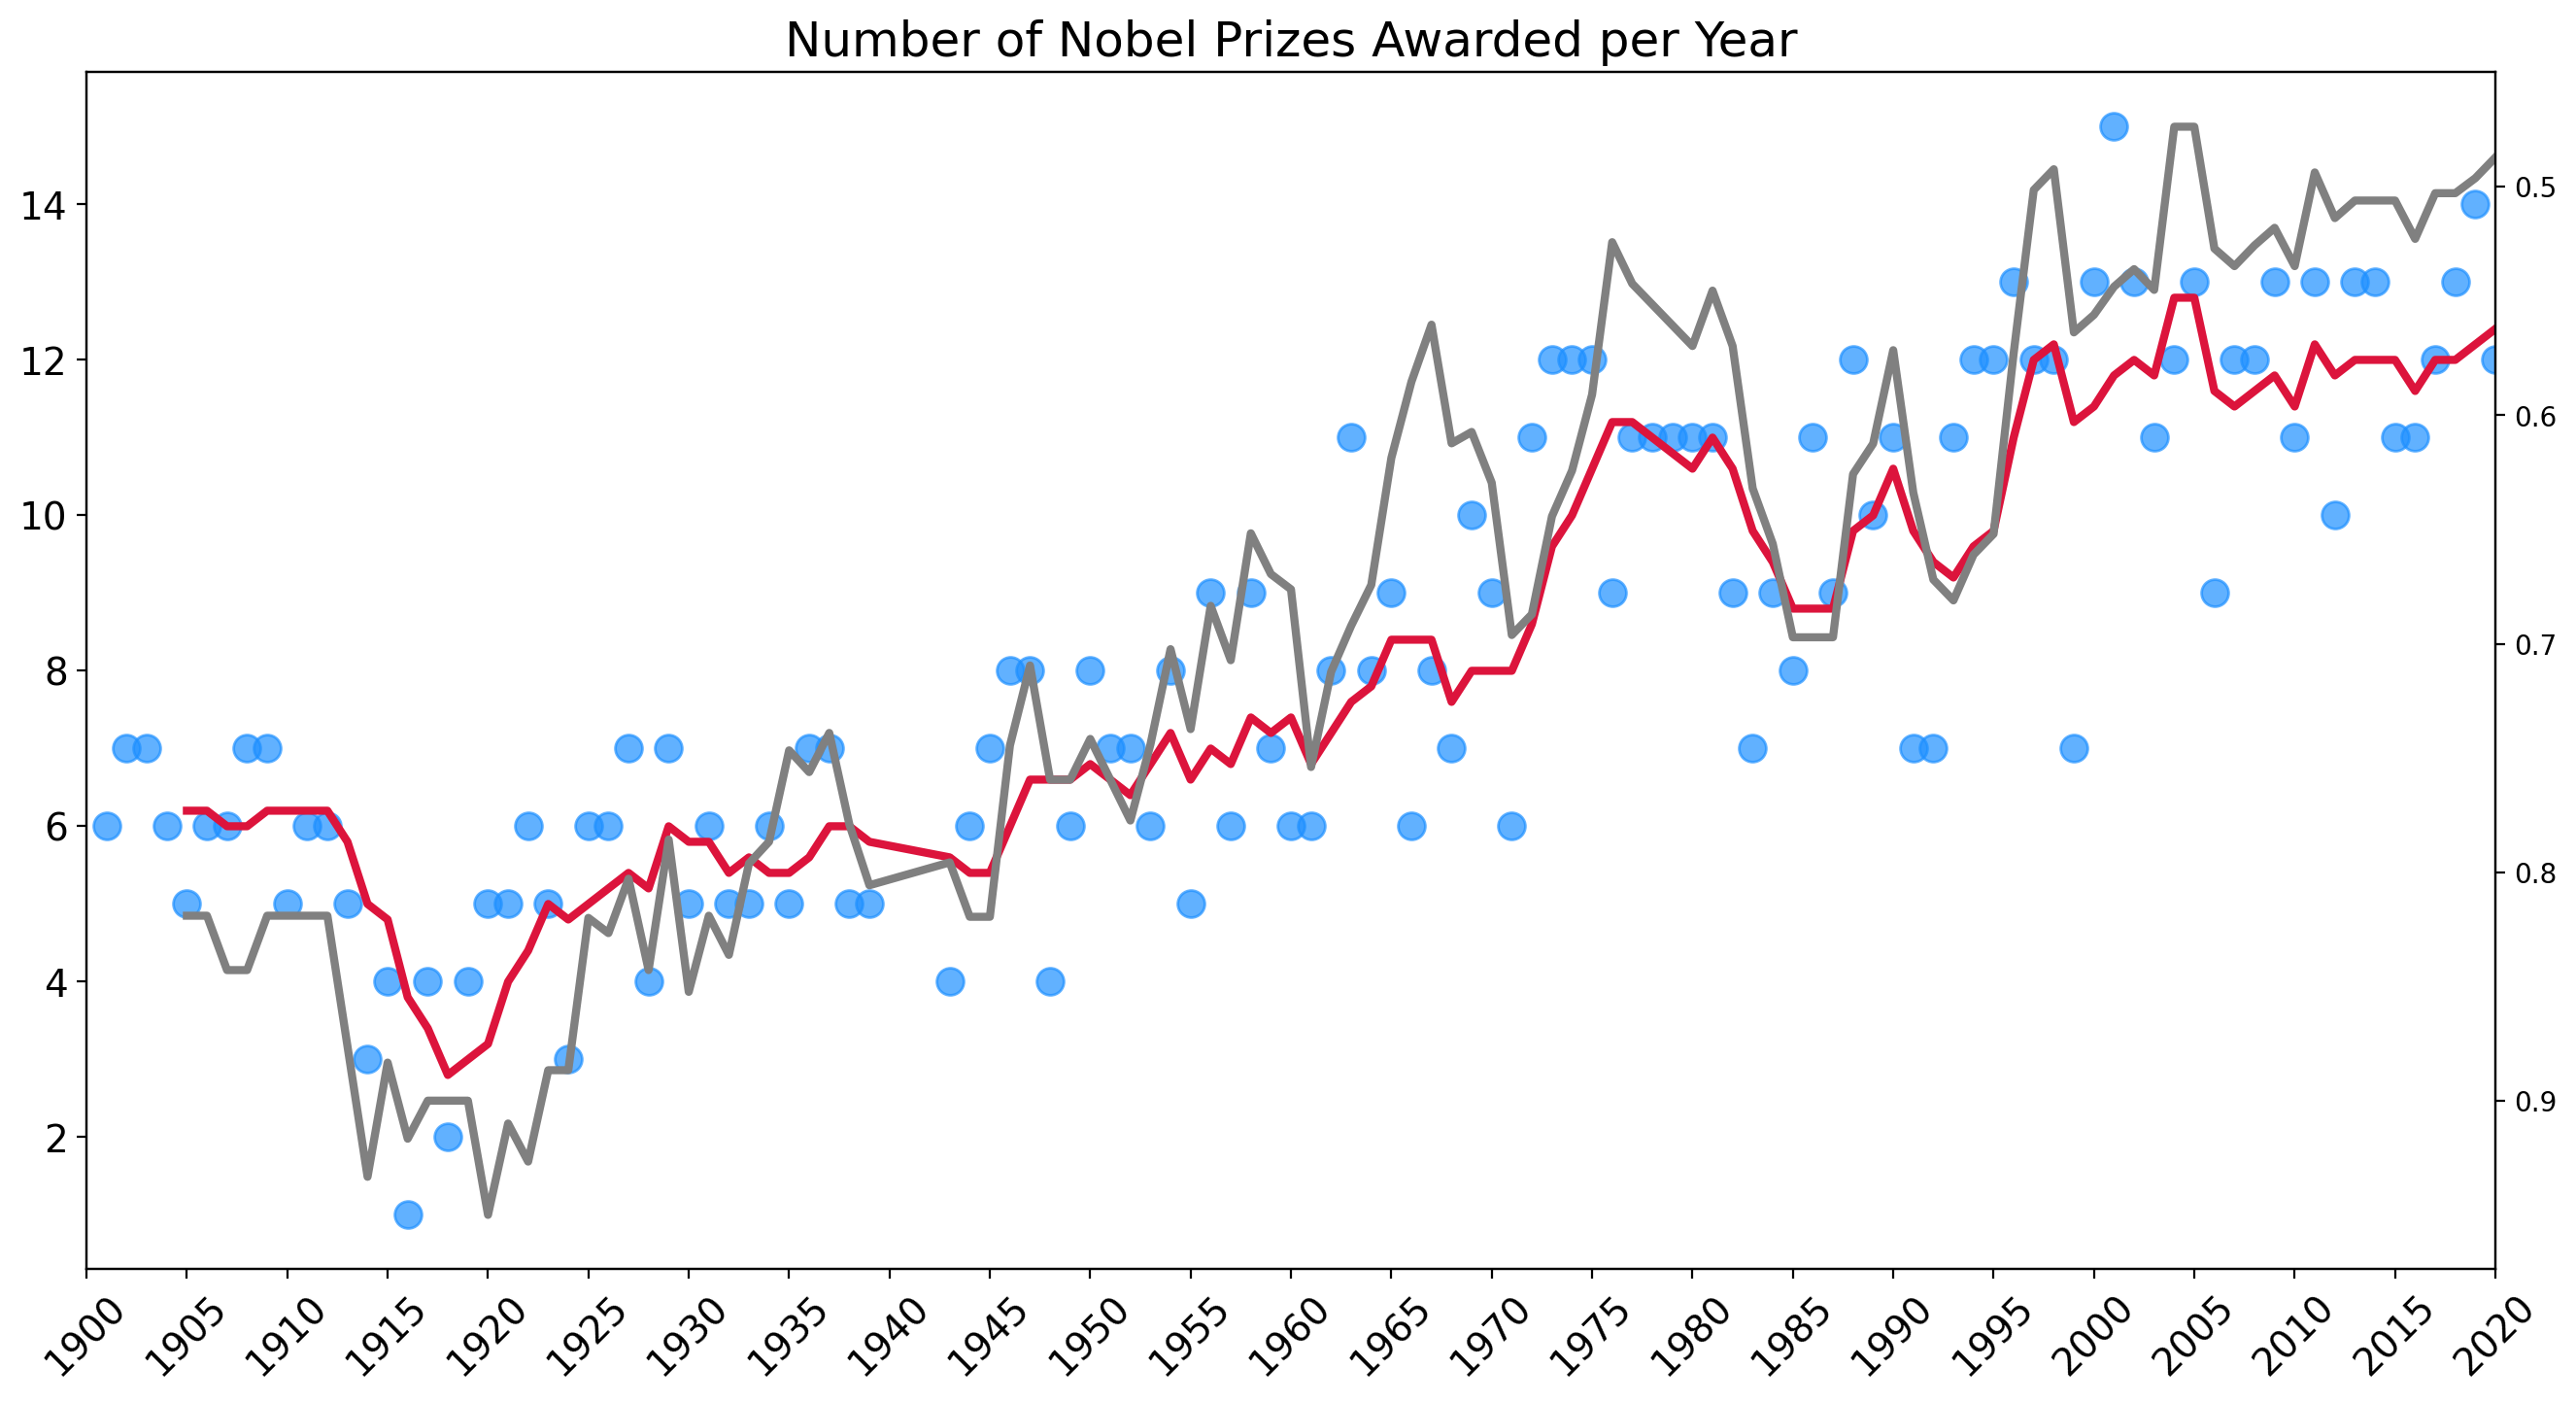

In [35]:
# invert the second y-axis
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Number of Nobel Prizes Awarded per Year", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# invert axis
ax2.invert_yaxis()

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c="dodgerblue",
    alpha=0.7,
    s=100,
)
ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c="crimson",
    linewidth=3,
)
ax2.plot(prize_per_year.index, share_moving_average.values, c="grey", linewidth=3)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [36]:
top20_countries = df_data.groupby("birth_country_current", as_index=False).agg(
    {"prize": pd.Series.count}
)
top20_countries.sort_values("prize", ascending=False, inplace=True)
top20_countries = top20_countries[:20]
top20_countries

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
40                     Japan     27
57                    Poland     27
61                    Russia     26
11                    Canada     20
68               Switzerland     19
39                     Italy     19
3                    Austria     18
51               Netherlands     18
20                   Denmark     12
13                     China     12
54                    Norway     12
2                  Australia     10
7                    Belgium      9
33                     India      9
65              South Africa      9

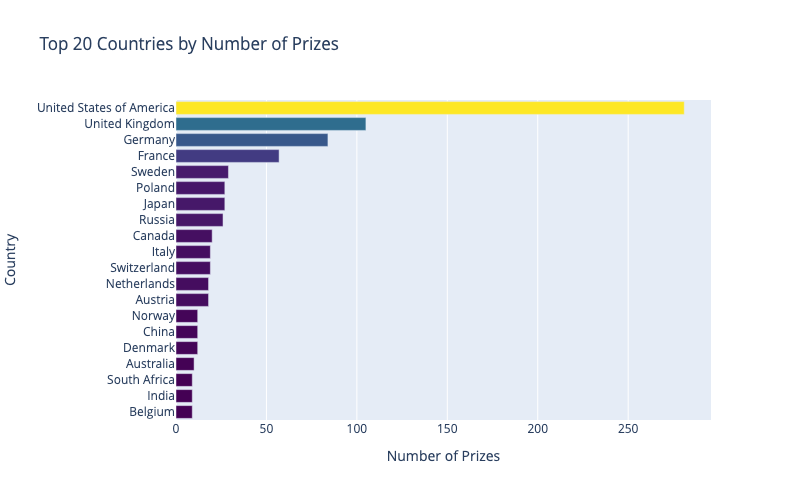

In [37]:
h_bar = px.bar(
    x=top20_countries.prize,
    y=top20_countries.birth_country_current,
    color=top20_countries.prize,
    orientation="h",
    color_continuous_scale="Viridis",
    title="Top 20 Countries by Number of Prizes",
    height=500,
)
h_bar.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    coloraxis_showscale=False,
    yaxis={"categoryorder": "total ascending"},
)

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [38]:
df_countries = df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg(
    {"prize": pd.Series.count}
)
df_countries.sort_values("prize", ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

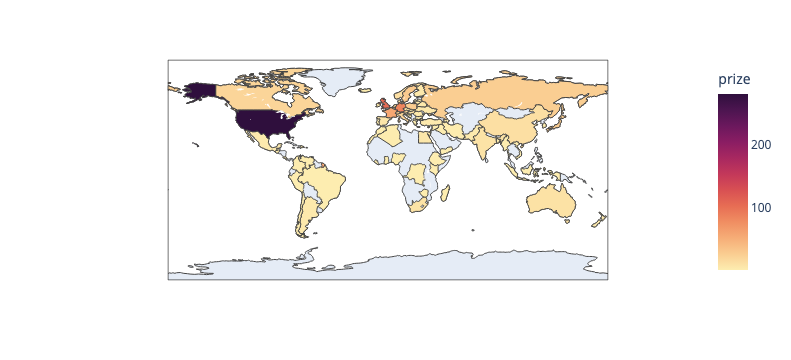

In [39]:
world_map = px.choropleth(
    df_countries,
    locations="ISO",
    color="prize",
    hover_name="birth_country_current",
    color_continuous_scale="matter",
)
# world_map.update_layout(coloraxis_showscale=True) # showscale defaul is True
world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [40]:
top20_countries

birth_country_current  prize
74  United States of America    281
73            United Kingdom    105
26                   Germany     84
25                    France     57
67                    Sweden     29
40                     Japan     27
57                    Poland     27
61                    Russia     26
11                    Canada     20
68               Switzerland     19
39                     Italy     19
3                    Austria     18
51               Netherlands     18
20                   Denmark     12
13                     China     12
54                    Norway     12
2                  Australia     10
7                    Belgium      9
33                     India      9
65              South Africa      9

In [41]:
cat_country = df_data.groupby(
    ["birth_country_current", "category"], as_index=False
).agg({"prize": pd.Series.count})
cat_country.sort_values(by="prize", ascending=False, inplace=True)
# merge cat_country with top20_counrties
merged_df = pd.merge(cat_country, top20_countries, on="birth_country_current")
# change column names
merged_df.columns = ["birth_country_current", "category", "cat_prize", "total_prize"]
merged_df.sort_values(by="total_prize", inplace=True)
merged_df

birth_country_current    category  cat_prize  total_prize
108                     India     Physics          1            9
107                     India       Peace          1            9
88               South Africa       Peace          3            9
89               South Africa    Medicine          3            9
90               South Africa  Literature          2            9
..                        ...         ...        ...          ...
4    United States of America       Peace         19          281
3    United States of America   Economics         49          281
2    United States of America   Chemistry         55          281
1    United States of America     Physics         70          281
0    United States of America    Medicine         78          281

[109 rows x 4 columns]

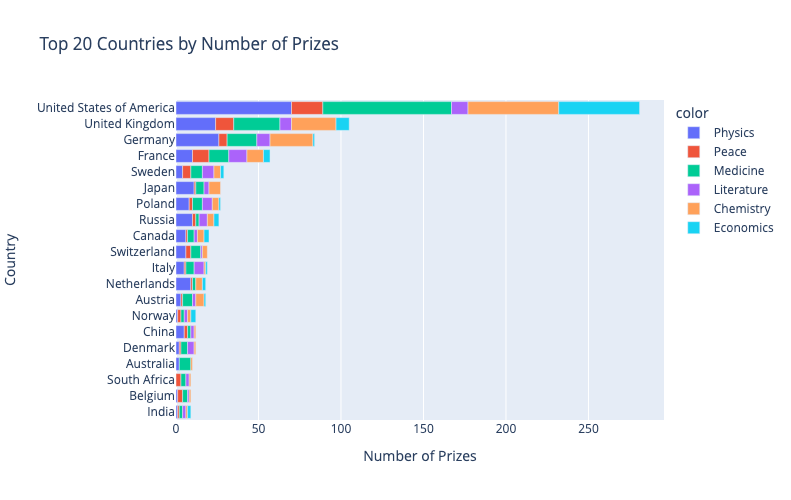

In [42]:
cat_cntry_bar = px.bar(
    x=merged_df.cat_prize,
    y=merged_df.birth_country_current,
    color=merged_df.category,
    orientation="h",
    title="Top 20 Countries by Number of Prizes",
    height=500,
)
cat_cntry_bar.update_layout(
    xaxis_title="Number of Prizes",
    yaxis_title="Country",
    yaxis={"categoryorder": "total ascending"},
)
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [43]:
prize_by_year = df_data.groupby(["birth_country_current", "year"], as_index=False).agg(
    {"prize": pd.Series.count}
)
prize_by_year = prize_by_year.sort_values("year")[
    ["year", "birth_country_current", "prize"]
]
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [44]:
cumulative_prizes = (
    prize_by_year.groupby(["birth_country_current", "year"])
    .sum()
    .groupby(level=[0])
    .cumsum()
)
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

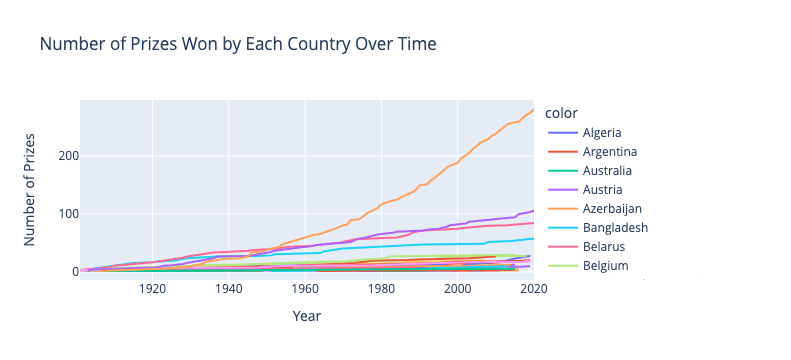

In [45]:
line = px.line(
    x=cumulative_prizes.year,
    y=cumulative_prizes.prize,
    color=cumulative_prizes.birth_country_current,
    hover_name=cumulative_prizes.birth_country_current,
    title="Number of Prizes Won by Each Country Over Time",
)
line.update_layout(xaxis_title="Year", yaxis_title="Number of Prizes")
line.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [73]:
top20_orgs = df_data.groupby("organization_name", as_index=False).agg(
    {"prize": pd.Series.count}
)
top20_orgs.sort_values("prize", inplace=True)
top20_orgs = top20_orgs[-20:]
# top20_orgs = df_data.organization_name.value_counts()[:20]
# top20_orgs.sort_values(ascending=True, inplace=True)

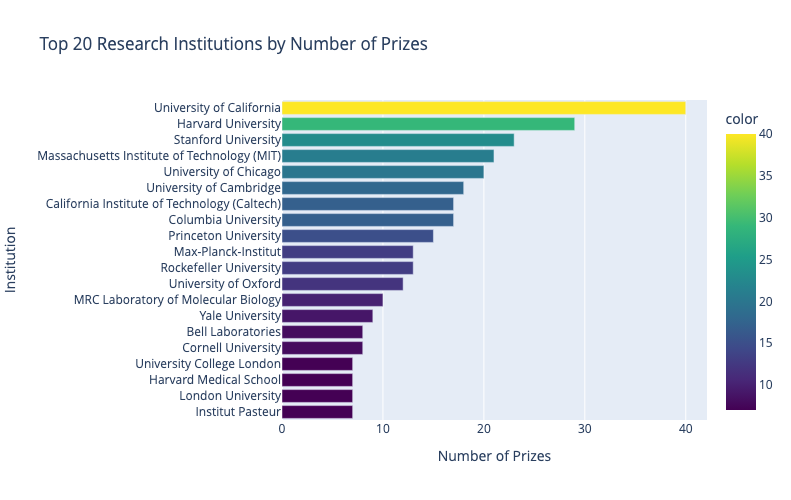

In [47]:
h_bar_orgs = px.bar(
    x=top20_orgs.prize,
    y=top20_orgs.organization_name,
    color=top20_orgs.prize,
    orientation="h",
    color_continuous_scale="Viridis",
    title="Top 20 Research Institutions by Number of Prizes",
    height=500,
)
h_bar_orgs.update_layout(xaxis_title="Number of Prizes", yaxis_title="Institution")
h_bar_orgs.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [48]:
top20_cities = df_data.groupby("organization_city", as_index=False).agg(
    {"prize": pd.Series.count}
)
top20_cities.sort_values("prize", inplace=True)
top20_cities = top20_cities[-20:]
top20_cities

organization_city  prize
65          Göttingen      8
186            Zurich      8
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
23         Boston, MA      9
108            Moscow     10
157         Stockholm     10
126            Oxford     12
13             Berlin     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

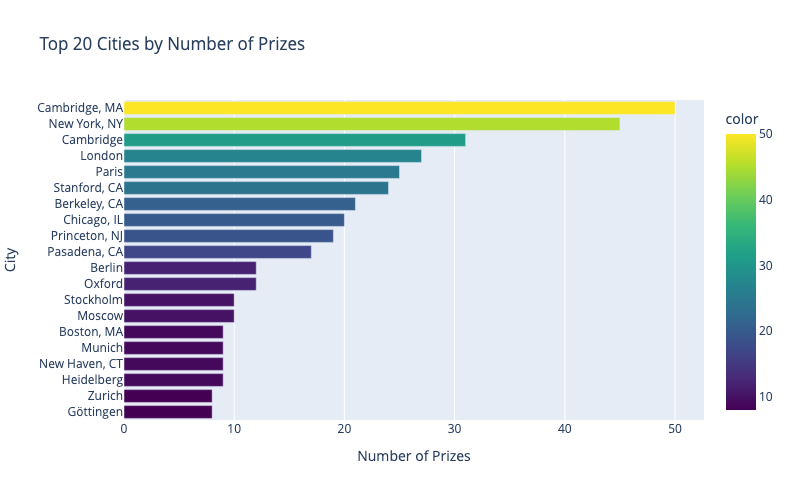

In [49]:
h_bar_cities = px.bar(
    x=top20_cities.prize,
    y=top20_cities.organization_city,
    color=top20_cities.prize,
    orientation="h",
    color_continuous_scale="Viridis",
    title="Top 20 Cities by Number of Prizes",
    height=500,
)
h_bar_cities.update_layout(xaxis_title="Number of Prizes", yaxis_title="City")
h_bar_cities.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [50]:
top20_birth = df_data.groupby("birth_city", as_index=False).agg(
    {"prize": pd.Series.count}
)
top20_birth.sort_values("prize", inplace=True)
top20_birth = top20_birth[-20:]
top20_birth

birth_city  prize
343          Milwaukee, WI      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
515              Stockholm      6
210                Hamburg      6
363                 Munich      7
358                 Moscow      7
590         Washington, DC      8
64              Boston, MA      8
76            Brooklyn, NY      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

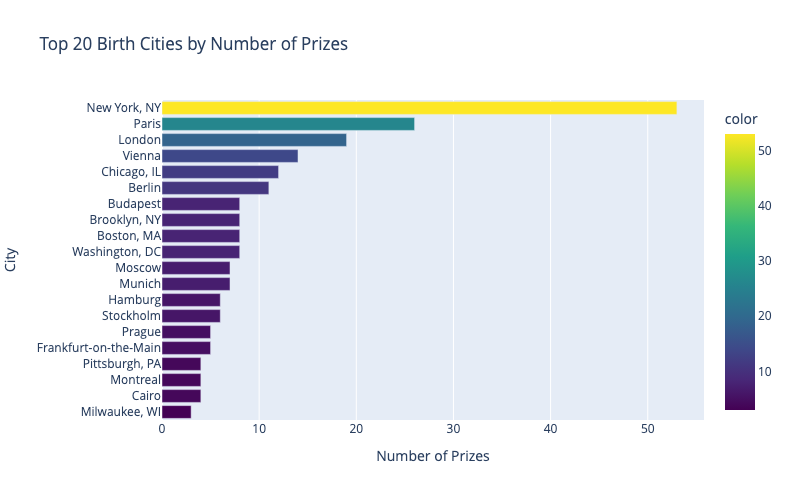

In [51]:
h_bar_birth = px.bar(
    x=top20_birth.prize,
    y=top20_birth.birth_city,
    color=top20_birth.prize,
    orientation="h",
    color_continuous_scale="Viridis",
    title="Top 20 Birth Cities by Number of Prizes",
    height=500,
)
h_bar_birth.update_layout(xaxis_title="Number of Prizes", yaxis_title="City")
h_bar_birth.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [59]:
df_orgs = df_data.groupby(
    ["birth_country_current", "organization_city", "organization_name"], as_index=False
).agg({"prize": pd.Series.count})
df_orgs

birth_country_current organization_city  \
0                     Algeria             Paris   
1                   Argentina      Buenos Aires   
2                   Argentina         Cambridge   
3                   Australia          Brighton   
4                   Australia          Canberra   
..                        ...               ...   
427  United States of America        Waltham MA   
428  United States of America    Washington, DC   
429  United States of America      Weston Creek   
430  United States of America     Worcester, MA   
431                 Venezuela        Boston, MA   

                                     organization_name  prize  
0                                    Collège de France      1  
1    Instituto de Biologia y Medicina Experimental ...      1  
2                  MRC Laboratory of Molecular Biology      1  
3                                 University of Sussex      1  
4                       Australian National University      1  
..                                                 ...    ...  
427                                Brandeis University      1  
428                       US Naval Research Laboratory      1  
429                     Australian National University      1  
430         University of Massachusetts Medical School      1  
431                             Harvard Medical School      1  

[432 rows x 4 columns]

In [75]:
sunburst = px.sunburst(
    df_orgs,
    path=["birth_country_current", "organization_city", "organization_name"],
    values="prize",
    title="Where do Discoveries Take Place?",
    height=600,
)
sunburst.update_layout(
    xaxis_title="Number of Prizes", yaxis_title="City", coloraxis_showscale=False
)
sunburst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [65]:
df_data["winning_age"] = df_data.year - df_data.birth_date.dt.year
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [69]:
youngest = df_data.winning_age.idxmin()
oldest = df_data.winning_age.idxmax()

In [83]:
df_data.iloc[[youngest]]

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

In [84]:
df_data.iloc[[oldest]]

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

In [71]:
print(f"The average age of a winner is: {df_data.winning_age.mean()}")

The average age of a winner is: 59.94860813704497


In [72]:
df_data.describe()

year  share_pct  winning_age
count   962.00     962.00       934.00
mean  1,971.82       0.63        59.95
std      33.81       0.29        12.62
min   1,901.00       0.25        17.00
25%   1,948.00       0.33        51.00
50%   1,977.00       0.50        60.00
75%   2,001.00       1.00        69.00
max   2,020.00       1.00        97.00

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

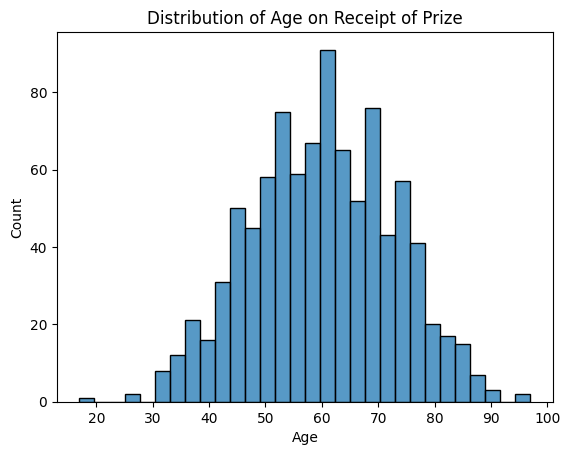

In [98]:
sns.histplot(df_data, x="winning_age", bins=30)
plt.xlabel("Age")
plt.title("Distribution of Age on Receipt of Prize")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. 
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(
        data=df_data,
        x="year",
        y="winning_age",
        lowess=True,
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "black"},
    )
plt.xlim(1900, 2020)
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

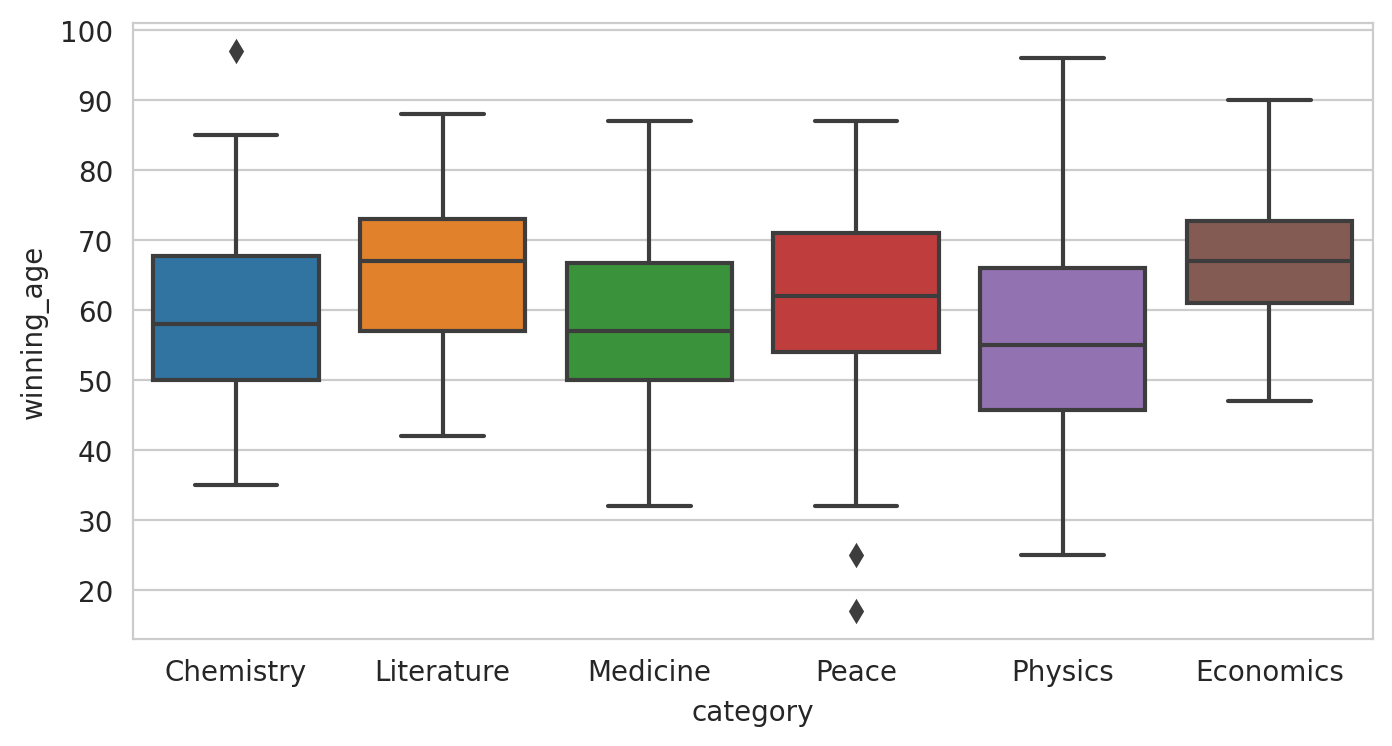

In [99]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data, x="category", y="winning_age")
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


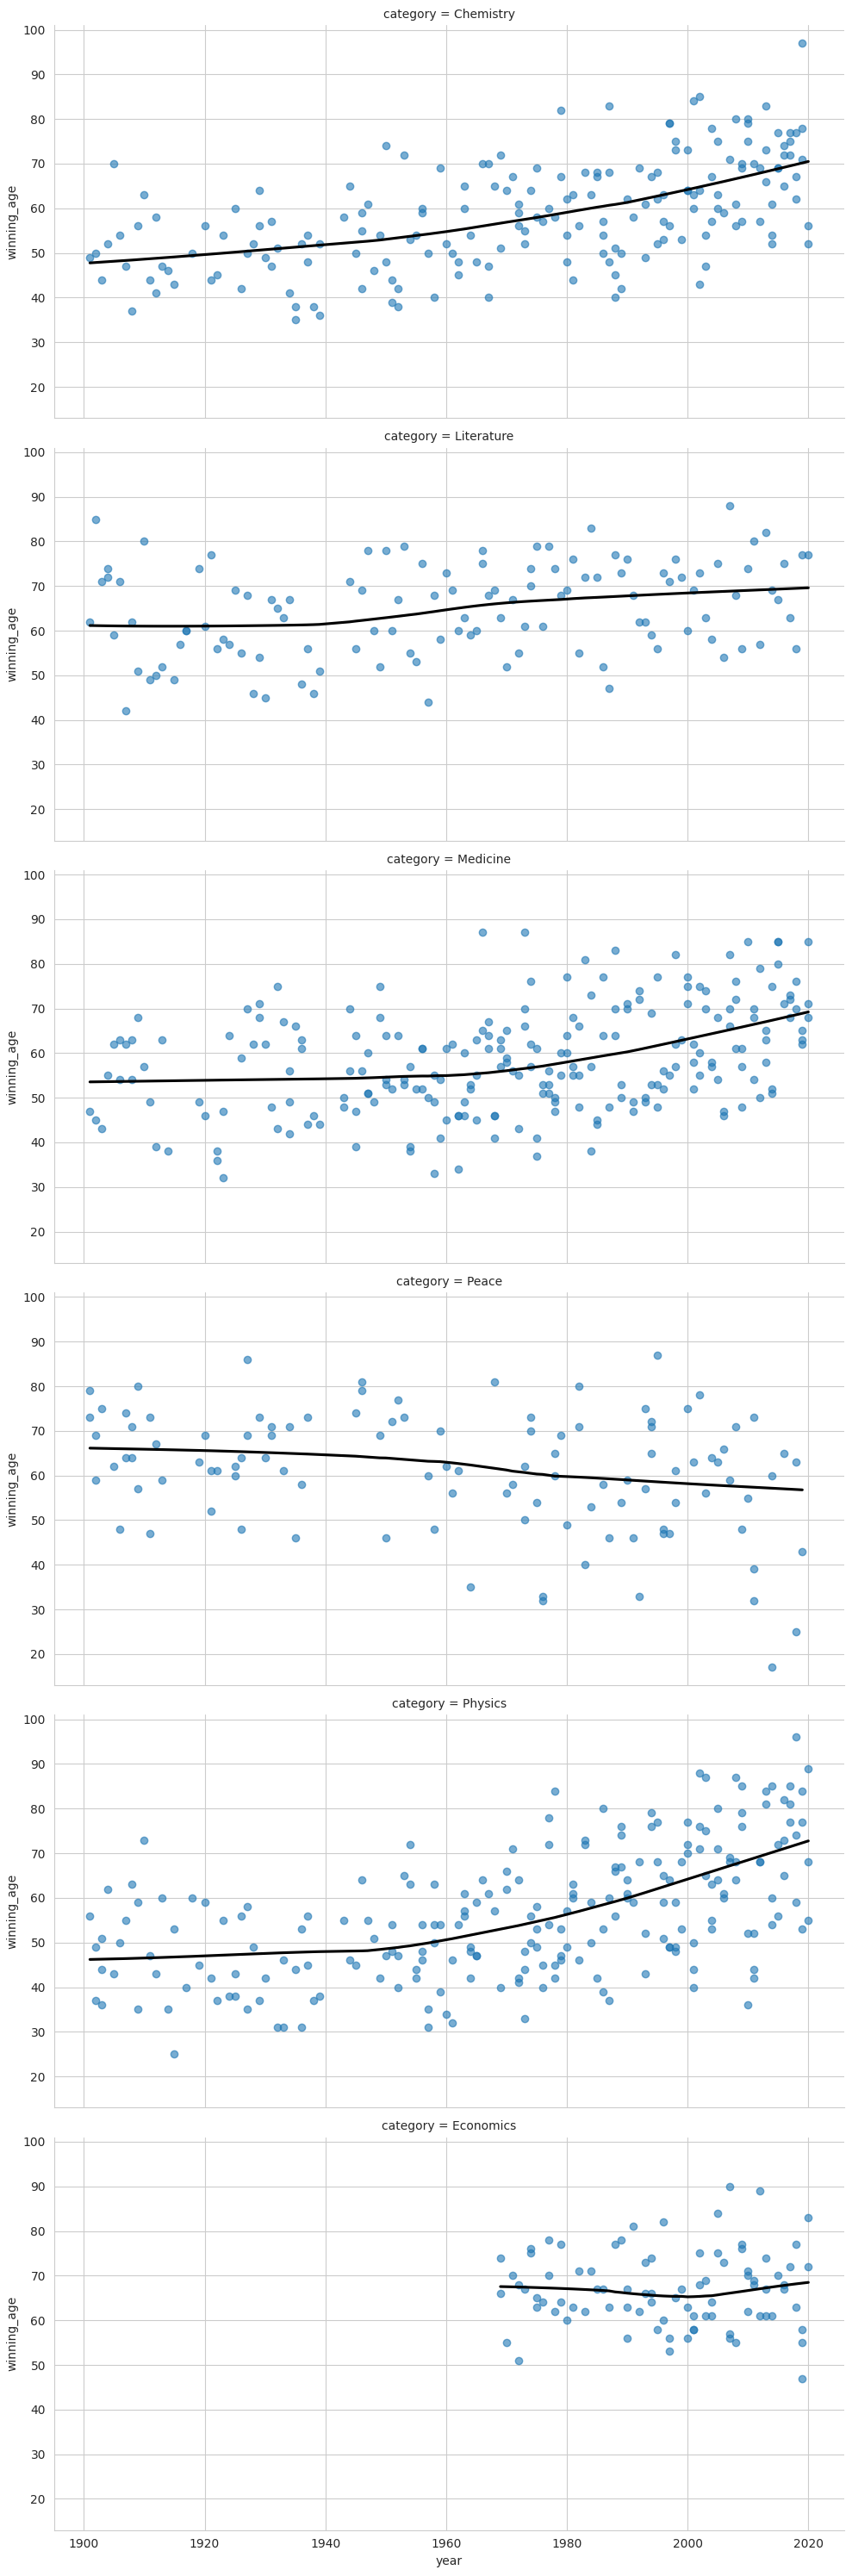

In [108]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        row="category",
        lowess=True,
        aspect=2,  # aspect * height = width
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "black"},
    )
plt.show()

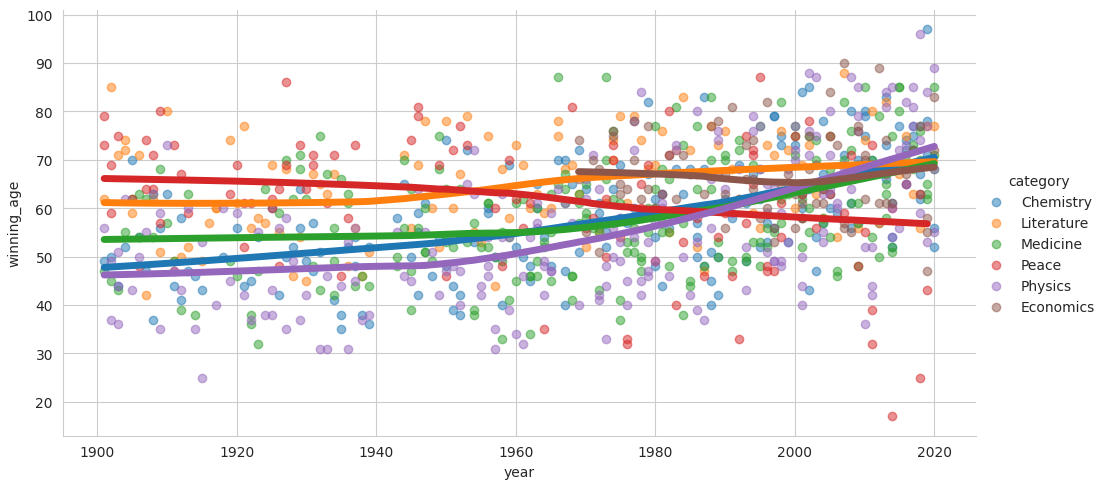

In [110]:
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x="year",
        y="winning_age",
        hue="category",
        lowess=True,
        aspect=2,
        scatter_kws={"alpha": 0.5},
        line_kws={"linewidth": 5},
    )
plt.show()

# Learning Points & Summary

* How to uncover and investigate NaN values.

* How to convert objects and string data types to numbers.

* Creating donut and bar charts with plotly.

* Create a rolling average to smooth out time-series data and show a trend.

* How to use ```.value_counts()```, ```.groupby()```, ```.merge()```, ```.sort_values()``` and ```.agg()```.

* Create a Choropleth to display data on a map.

* Create bar charts showing different segments of the data with plotly.

* Create Sunburst charts with plotly.

* Use Seaborn's ```.lmplot()``` and show best-fit lines across multiple categories using the ```row```, ```hue```, and ```lowess``` parameters.

* Understand how a different picture emerges when looking at the same data in different ways (e.g., box plots vs a time series analysis).

* See the distribution of our data and visualise descriptive statistics with the help of a histogram in Seaborn.